# RNN

Here, the dataset is generated using:

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"

import numpy as np
import pandas as pd

#Import torch stuff.
import torch
import torch.nn as nn
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.optim import lr_scheduler

#pip install git+https://github.com/facebookresearch/WavAugment.git
import augment

import IPython.display as ipd
import matplotlib.pyplot as plt

from tqdm import trange, tqdm

#Append the path outside so we can load bom1.
import sys
sys.path.append('..')

import bom1.wakeword as wf
import bom1.bom1 as bom1
from   bom1.toolbox import WakewordDataset, WakewordDatasetRNN

from sklearn.metrics import accuracy_score

import os

import pickle

In [2]:
#Set the notebook to run on the GPU, if available.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f'This notebook is running on the {device.type}.')

if device.type == 'cuda':
    torch.cuda.current_device()
    torch.cuda.set_device(1)

This notebook is running on the cpu.


In [3]:
folder = '/work3/s164419/01005WakeWordData/RNN_data_10s_shift_5s_1_to_1/train/'
train_dataset = WakewordDatasetRNN(f=lambda x: T.AmplitudeToDB()(T.Spectrogram(hop_length=40)(x)), folder=folder, normalize=True, #normalize the audio when reading it with torchaudio. 
                                              transforms = [#wf.AudioAugment(reverb = 100, snr = 15, pitch = 150, p = [0.5, 0.5, 0.5]),
                                              wf.TransformMono(), 
                                              wf.Padder(22050*10)],
                                              target_length = 1375,
                                              ) #sr * length of the clip

folder = '/work3/s164419/01005WakeWordData/RNN_data_10s_shift_5s_1_to_1/val/'
val_dataset = WakewordDatasetRNN(f=lambda x: T.AmplitudeToDB()(T.Spectrogram(hop_length=40)(x)), folder=folder, normalize=True, #normalize the audio when reading it with torchaudio. 
                                              transforms = [#wf.AudioAugment(reverb = 100, snr = 15, pitch = 150, p = [0.5, 0.5, 0.5]),
                                              wf.TransformMono(), 
                                              wf.Padder(22050*10)],
                                              target_length = 1375,
                                              ) #sr * length of the clip

#Create the loaders.
if device.type == 'cpu':
    batch_size = 128
else:
    batch_size = 512
    
train_loader  = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_loader    = DataLoader(val_dataset, shuffle=True, batch_size=batch_size)

# Try the RNN

In [4]:
from bom1.models import RNN_V1
rnn = RNN_V1().to(device)
with torch.no_grad():
    # rnn.load_state_dict(torch.load('../saved_models/RNN_V1/modellul.pth', map_location=device))
    rnn.load_state_dict(torch.load('../saved_models/RNN_V1/model2.pth', map_location=device))

Training data

In [5]:
#Fetch the data
with torch.no_grad():
    x, targets, path = next(iter(train_loader))

    x = x.to(device)

    outputs = rnn(x).squeeze(-1)

contains_catchphrase = targets.any(axis=1)

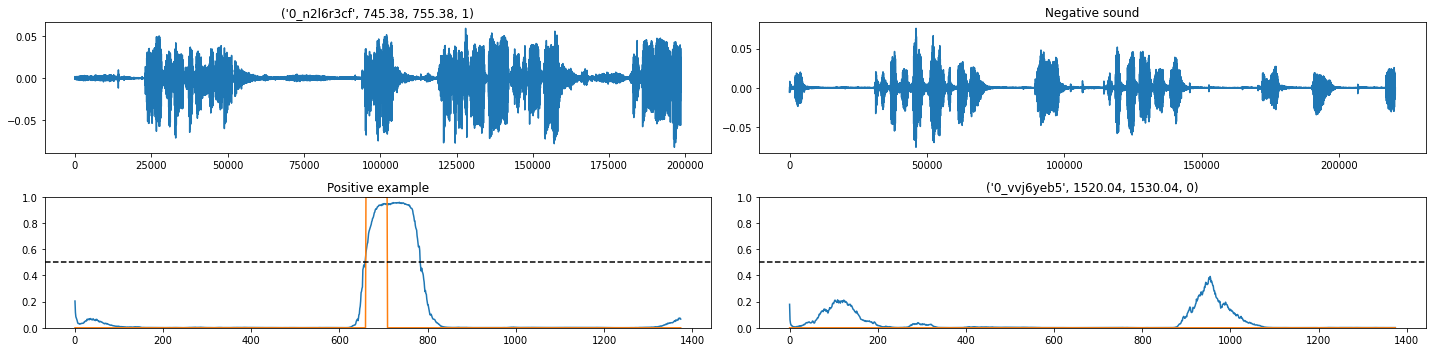

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_n2l6r3cf/format/url/protocol/https
From 00:12:25.38 to 00:12:35.38
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vvj6yeb5/format/url/protocol/https
From 00:25:20.04 to 00:25:30.04


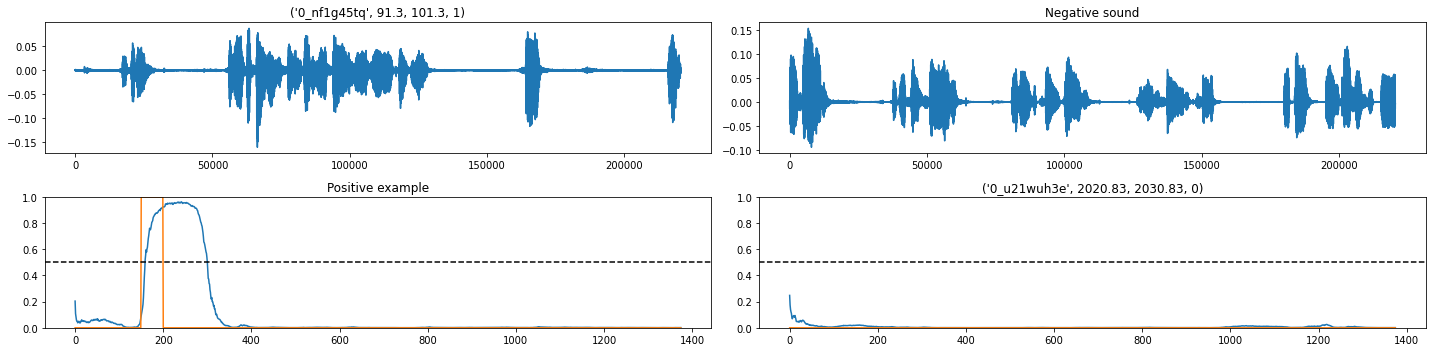

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_nf1g45tq/format/url/protocol/https
From 00:01:31.30 to 00:01:41.30
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_u21wuh3e/format/url/protocol/https
From 00:33:40.83 to 00:33:50.83


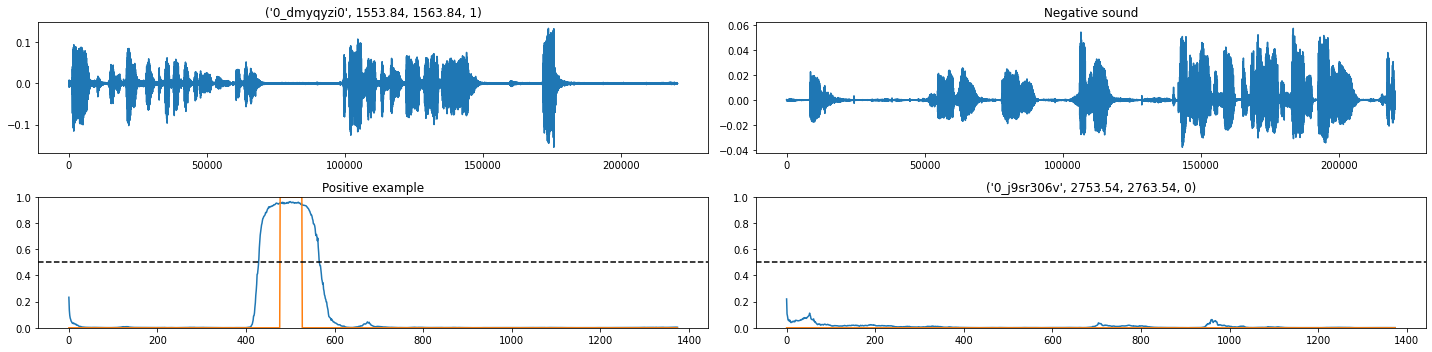

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_dmyqyzi0/format/url/protocol/https
From 00:25:53.84 to 00:26:03.84
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_j9sr306v/format/url/protocol/https
From 00:45:53.54 to 00:46:03.54


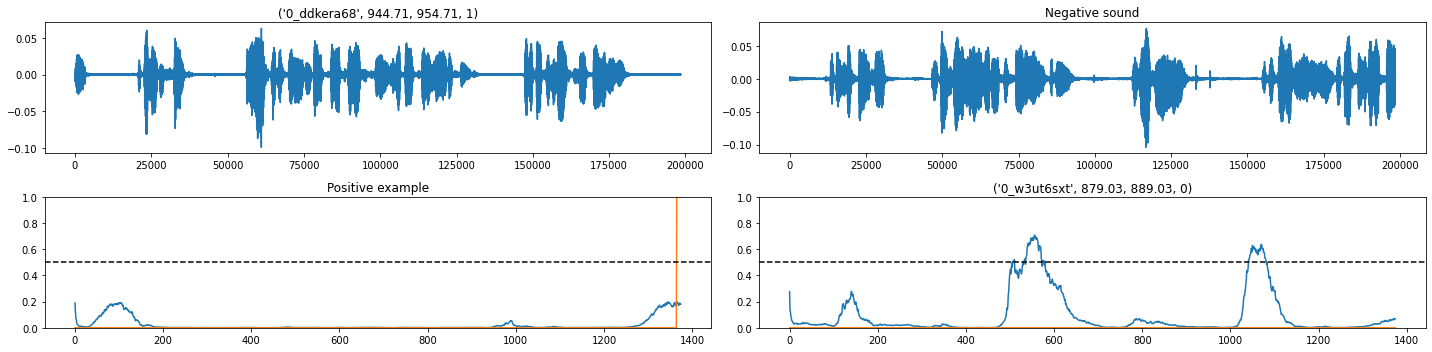

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ddkera68/format/url/protocol/https
From 00:15:44.71 to 00:15:54.71
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w3ut6sxt/format/url/protocol/https
From 00:14:39.03 to 00:14:49.03


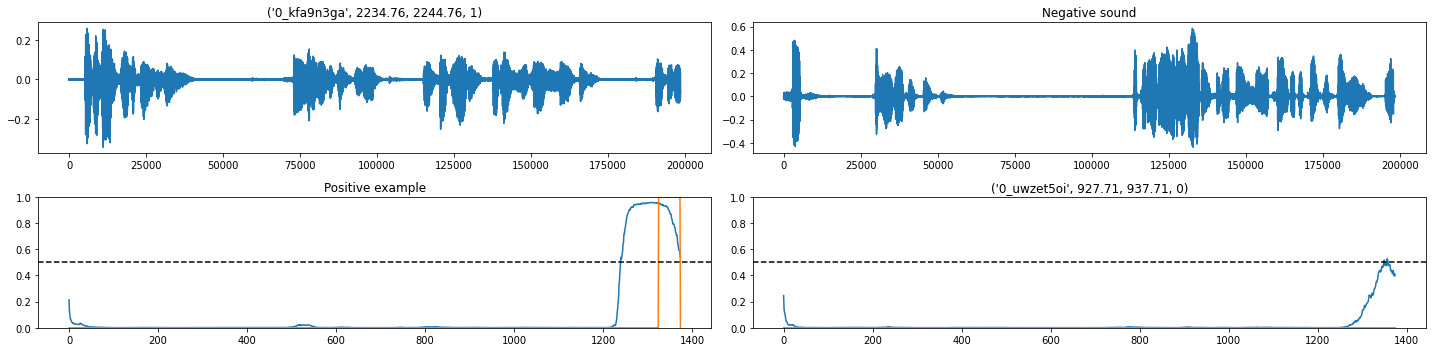

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_kfa9n3ga/format/url/protocol/https
From 00:37:14.76 to 00:37:24.76
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_uwzet5oi/format/url/protocol/https
From 00:15:27.71 to 00:15:37.71


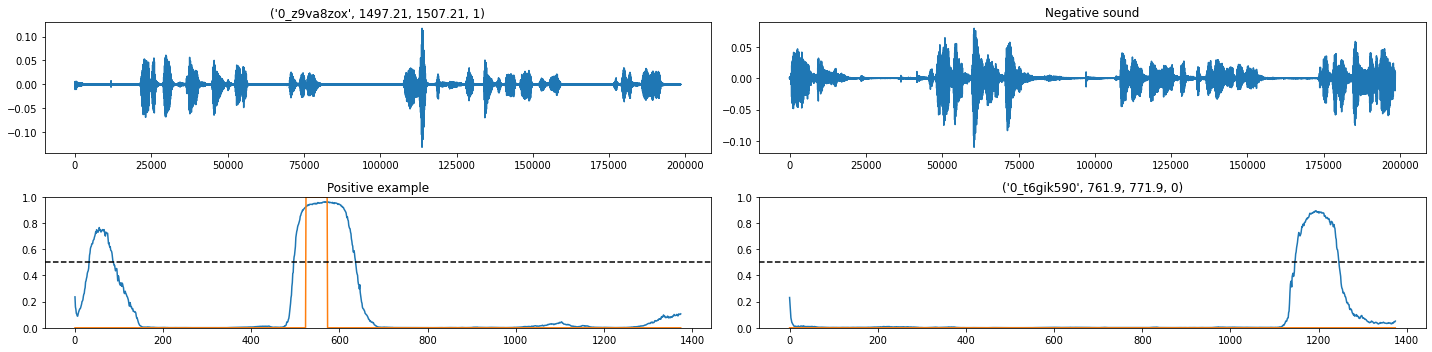

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_z9va8zox/format/url/protocol/https
From 00:24:57.21 to 00:25:07.21
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_t6gik590/format/url/protocol/https
From 00:12:41.90 to 00:12:51.90


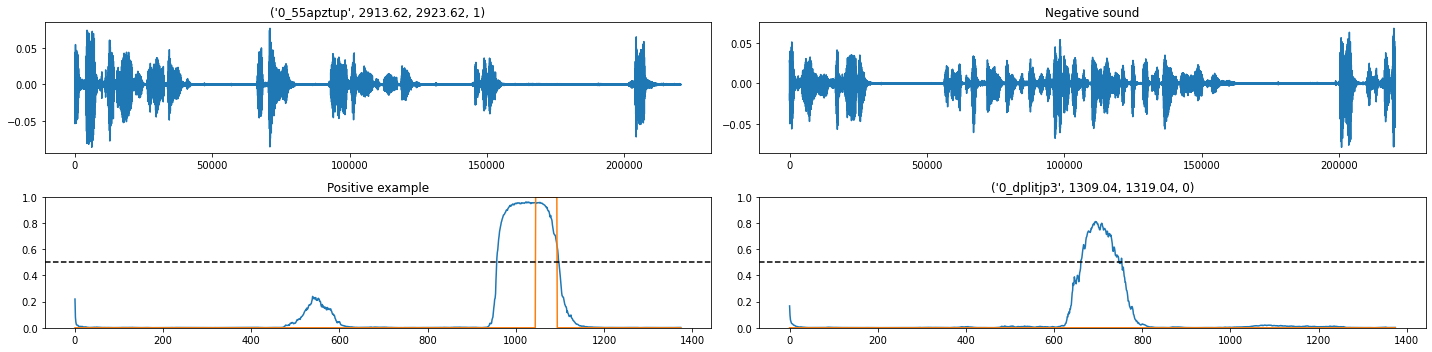

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_55apztup/format/url/protocol/https
From 00:48:33.62 to 00:48:43.62
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_dplitjp3/format/url/protocol/https
From 00:21:49.04 to 00:21:59.04


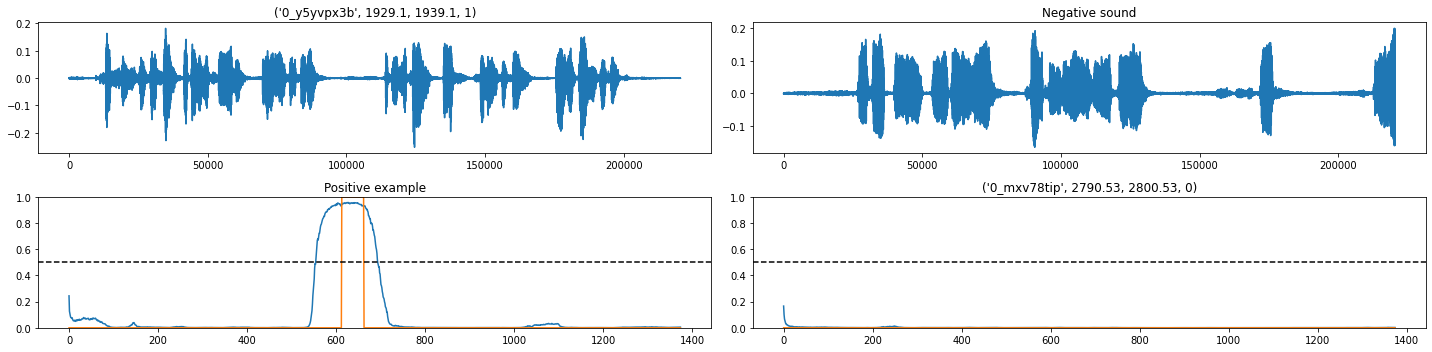

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_y5yvpx3b/format/url/protocol/https
From 00:32:09.10 to 00:32:19.10
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_mxv78tip/format/url/protocol/https
From 00:46:30.53 to 00:46:40.53


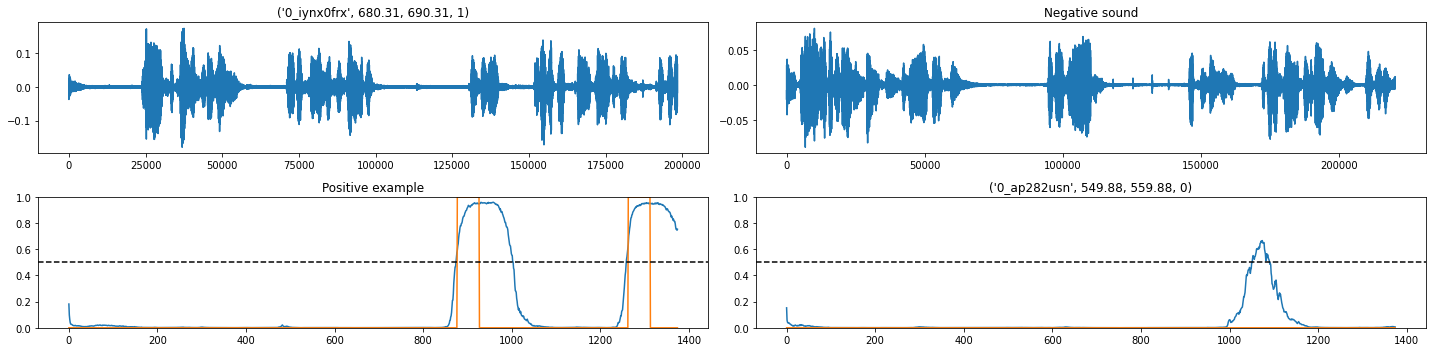

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_iynx0frx/format/url/protocol/https
From 00:11:20.31 to 00:11:30.31
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ap282usn/format/url/protocol/https
From 00:09:09.88 to 00:09:19.88


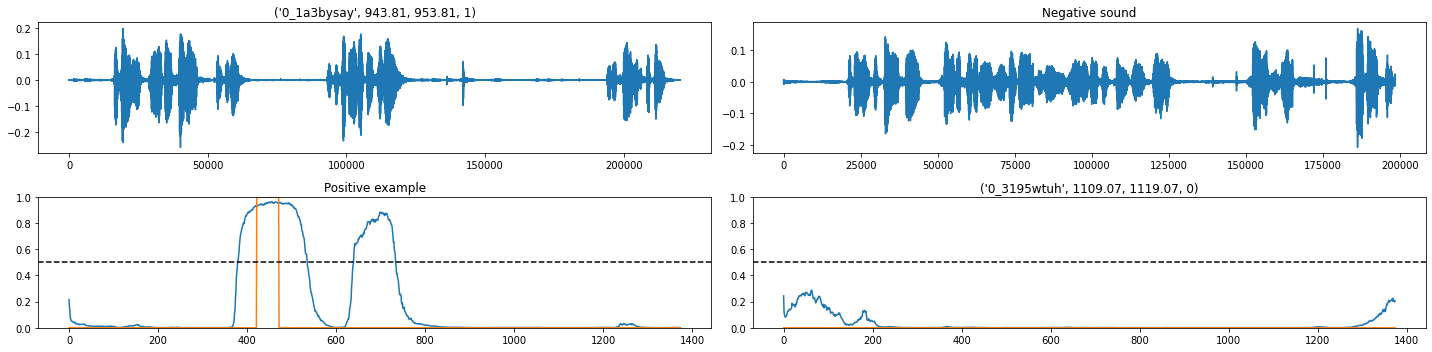

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_1a3bysay/format/url/protocol/https
From 00:15:43.81 to 00:15:53.81
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_3195wtuh/format/url/protocol/https
From 00:18:29.07 to 00:18:39.07


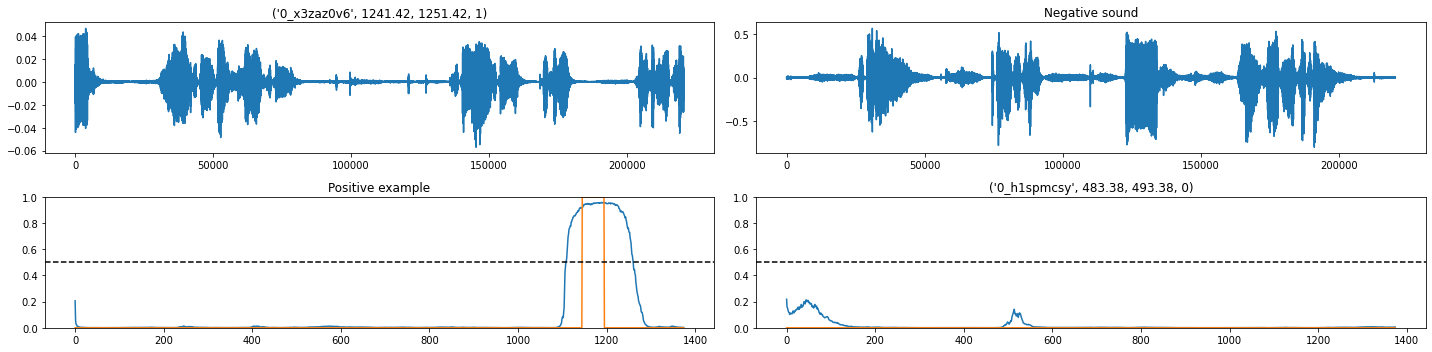

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_x3zaz0v6/format/url/protocol/https
From 00:20:41.42 to 00:20:51.42
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_h1spmcsy/format/url/protocol/https
From 00:08:03.38 to 00:08:13.38


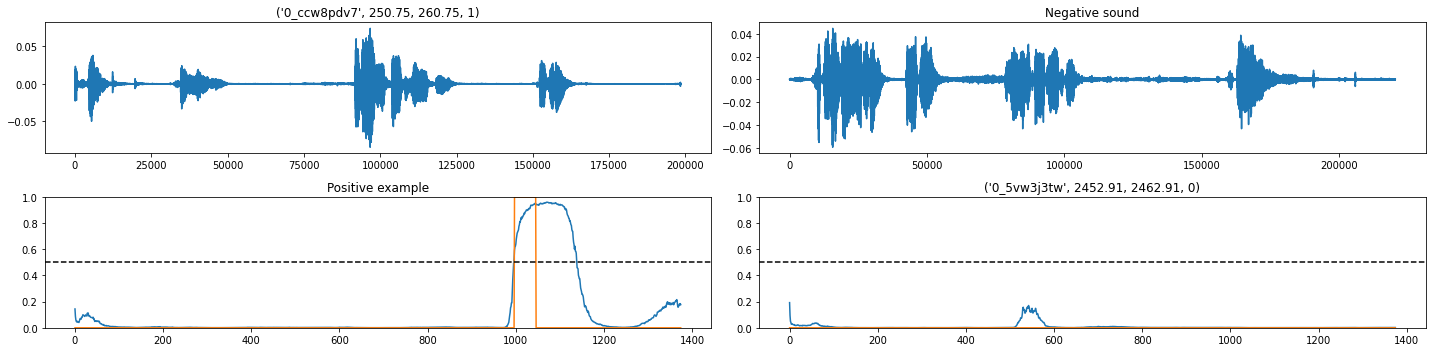

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ccw8pdv7/format/url/protocol/https
From 00:04:10.75 to 00:04:20.75
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_5vw3j3tw/format/url/protocol/https
From 00:40:52.91 to 00:41:02.91


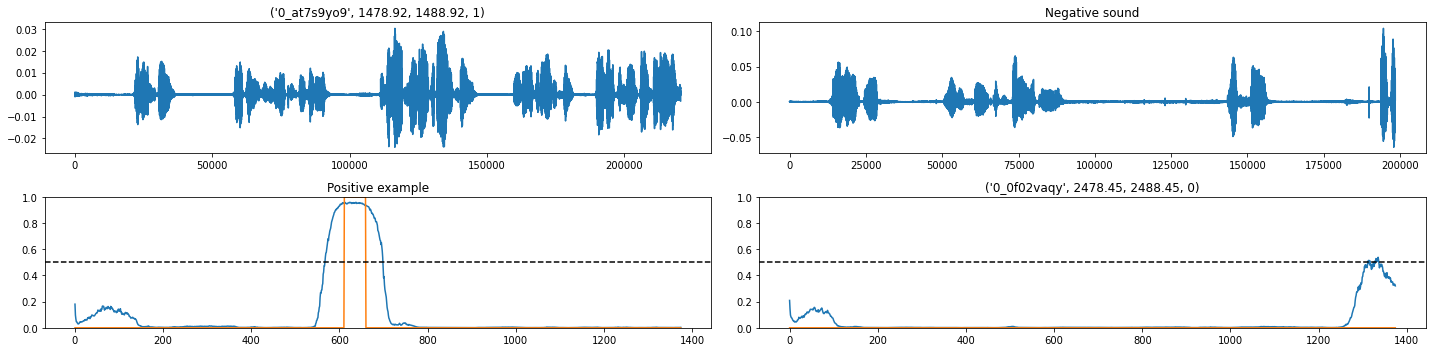

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_at7s9yo9/format/url/protocol/https
From 00:24:38.92 to 00:24:48.92
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_0f02vaqy/format/url/protocol/https
From 00:41:18.45 to 00:41:28.45


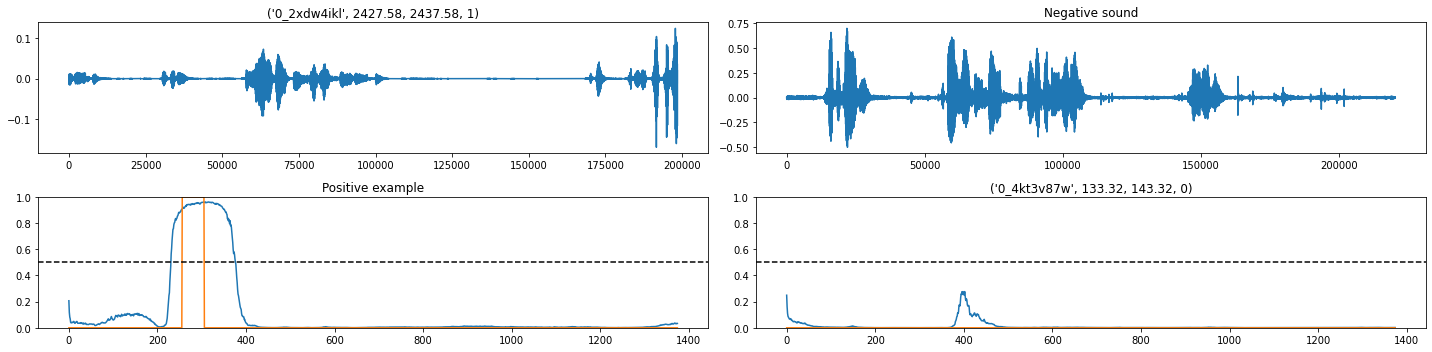

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_2xdw4ikl/format/url/protocol/https
From 00:40:27.58 to 00:40:37.58
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_4kt3v87w/format/url/protocol/https
From 00:02:13.32 to 00:02:23.32


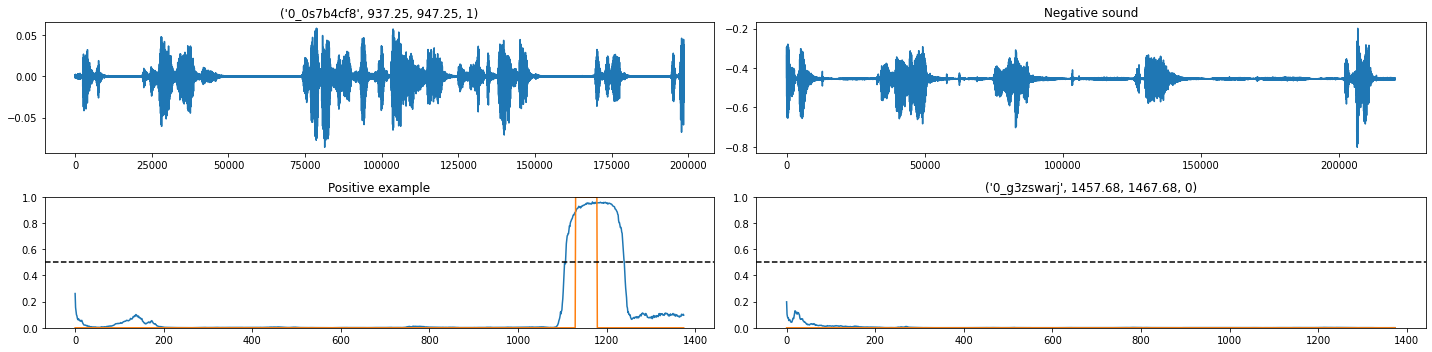

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_0s7b4cf8/format/url/protocol/https
From 00:15:37.25 to 00:15:47.25
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_g3zswarj/format/url/protocol/https
From 00:24:17.68 to 00:24:27.68


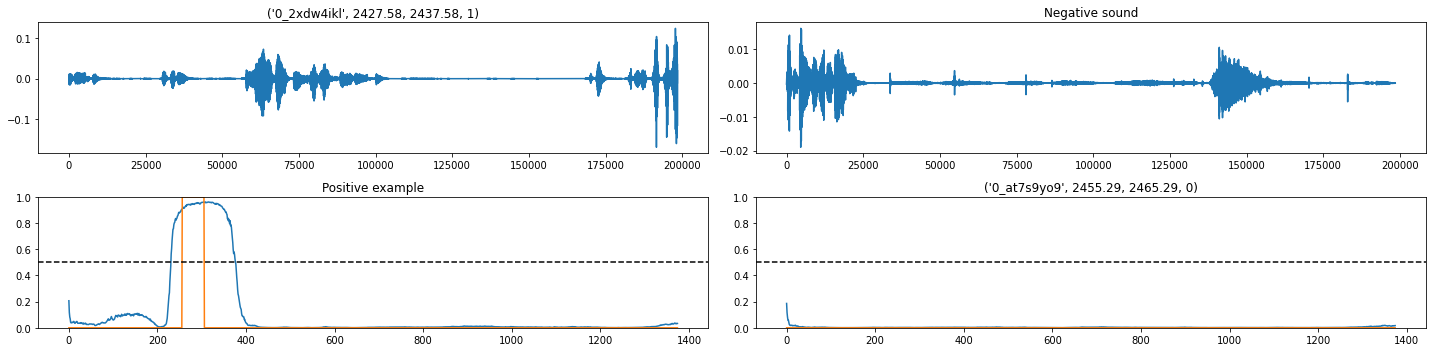

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_2xdw4ikl/format/url/protocol/https
From 00:40:27.58 to 00:40:37.58
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_at7s9yo9/format/url/protocol/https
From 00:40:55.29 to 00:41:05.29


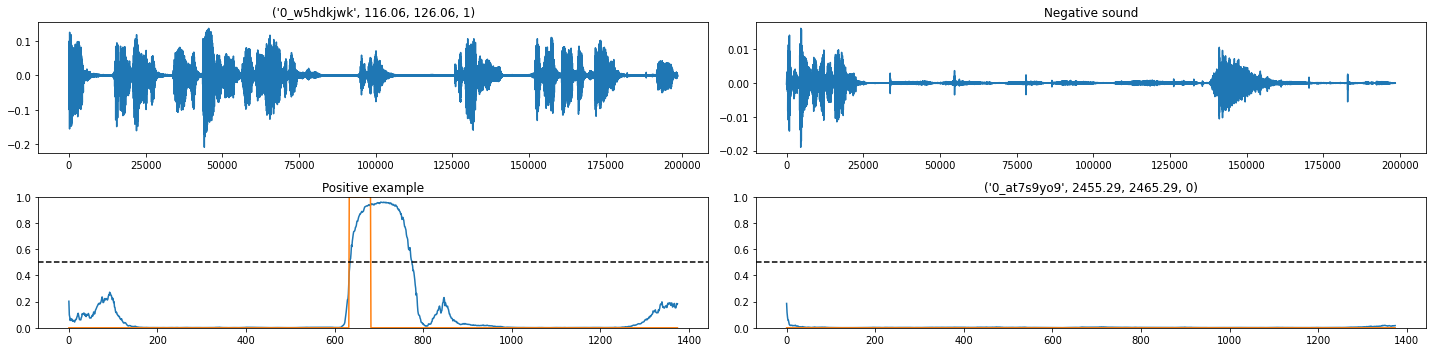

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w5hdkjwk/format/url/protocol/https
From 00:01:56.06 to 00:02:06.06
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_at7s9yo9/format/url/protocol/https
From 00:40:55.29 to 00:41:05.29


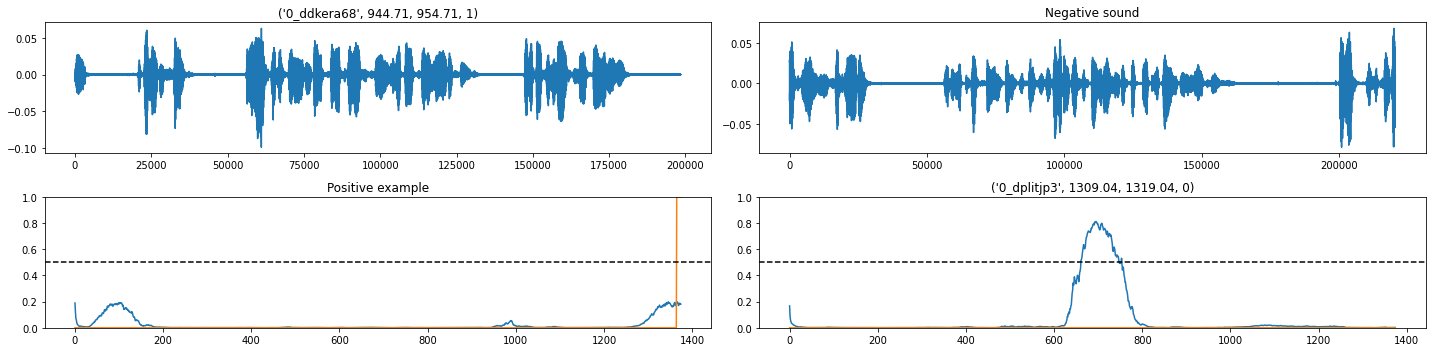

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ddkera68/format/url/protocol/https
From 00:15:44.71 to 00:15:54.71
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_dplitjp3/format/url/protocol/https
From 00:21:49.04 to 00:21:59.04


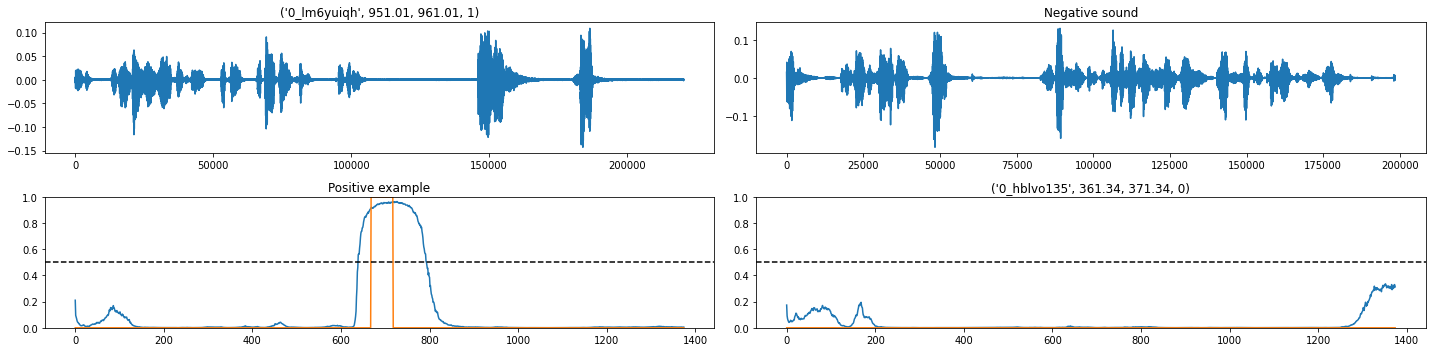

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_lm6yuiqh/format/url/protocol/https
From 00:15:51.01 to 00:16:01.01
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_hblvo135/format/url/protocol/https
From 00:06:01.34 to 00:06:11.34


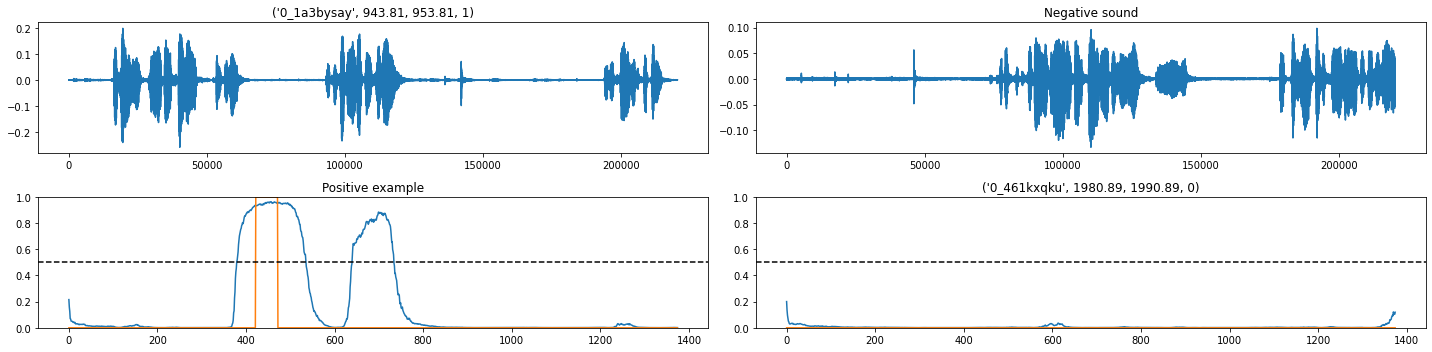

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_1a3bysay/format/url/protocol/https
From 00:15:43.81 to 00:15:53.81
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_461kxqku/format/url/protocol/https
From 00:33:00.89 to 00:33:10.89


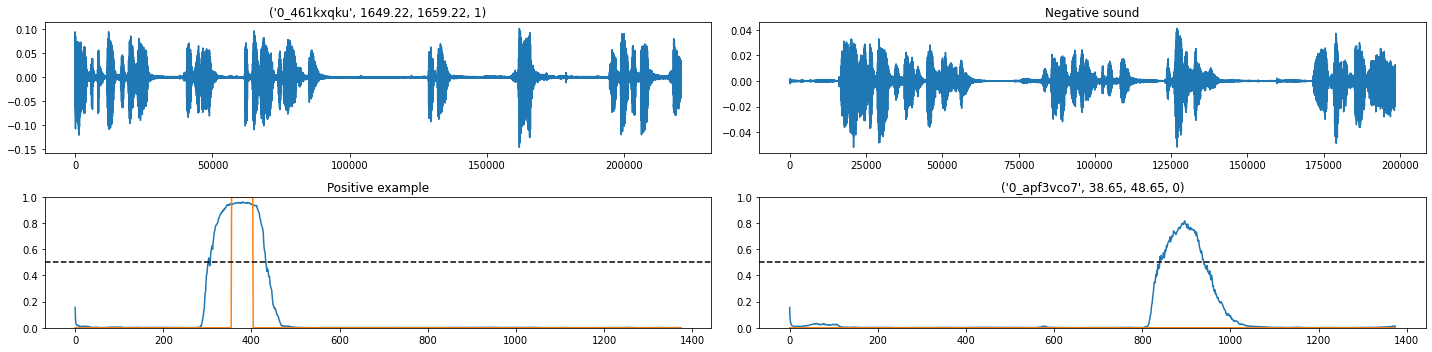

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_461kxqku/format/url/protocol/https
From 00:27:29.22 to 00:27:39.22
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_apf3vco7/format/url/protocol/https
From 00:00:38.65 to 00:00:48.65


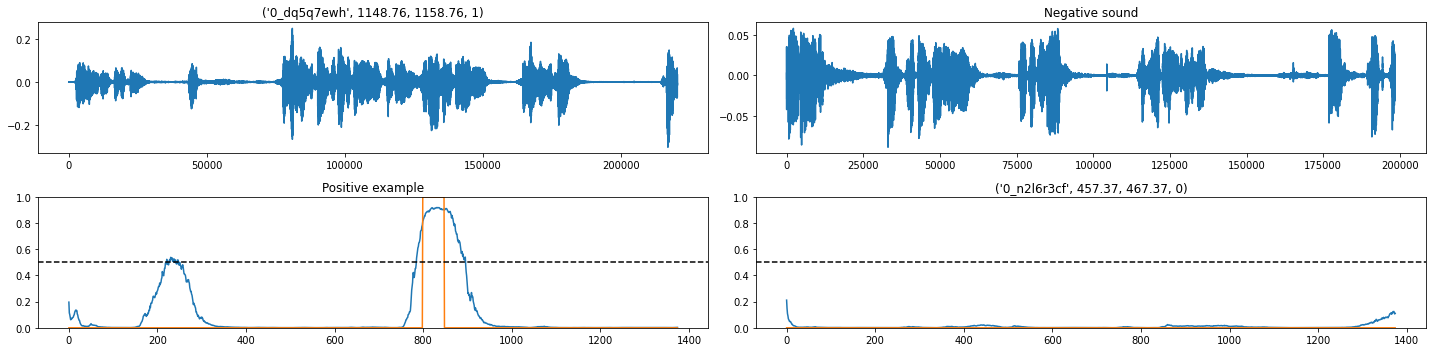

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_dq5q7ewh/format/url/protocol/https
From 00:19:08.76 to 00:19:18.76
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_n2l6r3cf/format/url/protocol/https
From 00:07:37.37 to 00:07:47.37


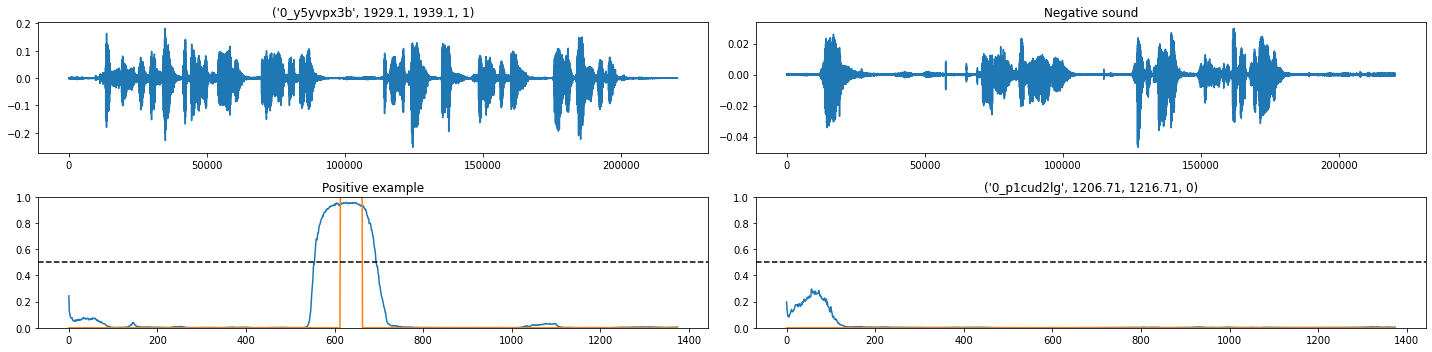

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_y5yvpx3b/format/url/protocol/https
From 00:32:09.10 to 00:32:19.10
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_p1cud2lg/format/url/protocol/https
From 00:20:06.71 to 00:20:16.71


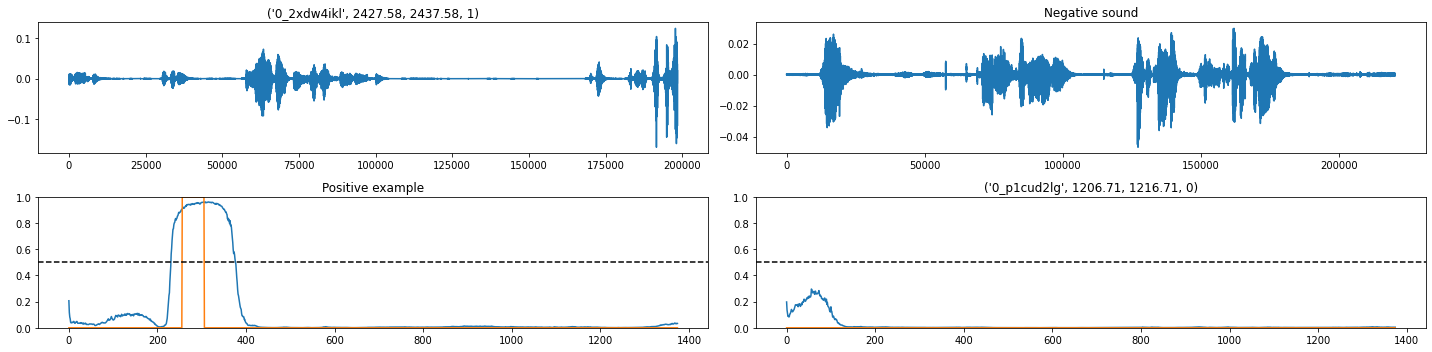

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_2xdw4ikl/format/url/protocol/https
From 00:40:27.58 to 00:40:37.58
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_p1cud2lg/format/url/protocol/https
From 00:20:06.71 to 00:20:16.71


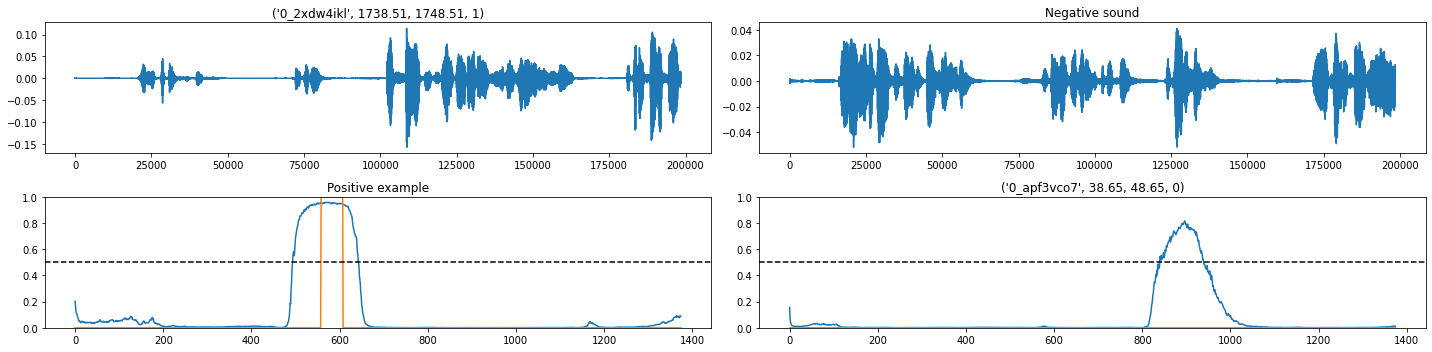

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_2xdw4ikl/format/url/protocol/https
From 00:28:58.51 to 00:29:08.51
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_apf3vco7/format/url/protocol/https
From 00:00:38.65 to 00:00:48.65


In [6]:
for i in range(25):

    idx_positive = np.random.choice(torch.where(contains_catchphrase)[0])
    idx_negative = np.random.choice(torch.where(contains_catchphrase==0)[0])

    plt.figure(figsize=(20,5))

    plt.subplot(2,2,1)
    audio, sr = torchaudio.load(path[idx_positive])
    plt.plot(audio.mean(axis=0))
    plt.title(wf.info_from_path(path[idx_positive]))

    plt.subplot(2,2,2)
    audio, sr = torchaudio.load(path[idx_negative])
    plt.plot(audio.mean(axis=0))
    plt.title('Negative sound')

    plt.subplot(2,2,3)
    plt.title('Positive example')
    plt.plot(torch.sigmoid(outputs[idx_positive]).detach().cpu())
    plt.plot(targets[idx_positive].detach().cpu())
    plt.axhline(0.5, linestyle='--', color='black')
    plt.ylim([0, 1])

    plt.subplot(2,2,4)
    plt.title(wf.info_from_path(path[idx_negative]))
    plt.plot(torch.sigmoid(outputs[idx_negative]).detach().cpu())
    plt.plot(targets[idx_negative].detach().cpu())
    plt.axhline(0.5, linestyle='--', color='black')
    plt.ylim([0, 1])

    plt.tight_layout()
    plt.show()

    print('Positive example:')
    ID, t1, t2, _ = wf.info_from_path(path[idx_positive])
    print(bom1.stream_link(ID))
    print(f'From {bom1.seconds_to_timestamp(t1)} to {bom1.seconds_to_timestamp(t2)}')

    print('Negative example:')
    ID, t1, t2, _ = wf.info_from_path(path[idx_negative])
    print(bom1.stream_link(ID))
    print(f'From {bom1.seconds_to_timestamp(t1)} to {bom1.seconds_to_timestamp(t2)}')

Test data

In [7]:
#Fetch the data
with torch.no_grad():
    x, targets, path = next(iter(val_loader))

    x = x.to(device)

    outputs = rnn(x).squeeze(-1)

contains_catchphrase = targets.any(axis=1)

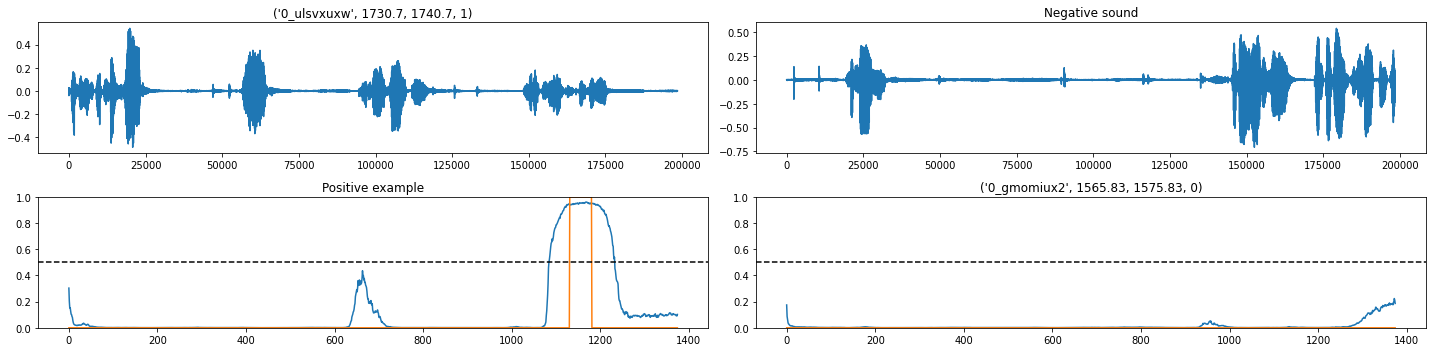

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ulsvxuxw/format/url/protocol/https
From 00:28:50.70 to 00:29:00.70
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_gmomiux2/format/url/protocol/https
From 00:26:05.83 to 00:26:15.83


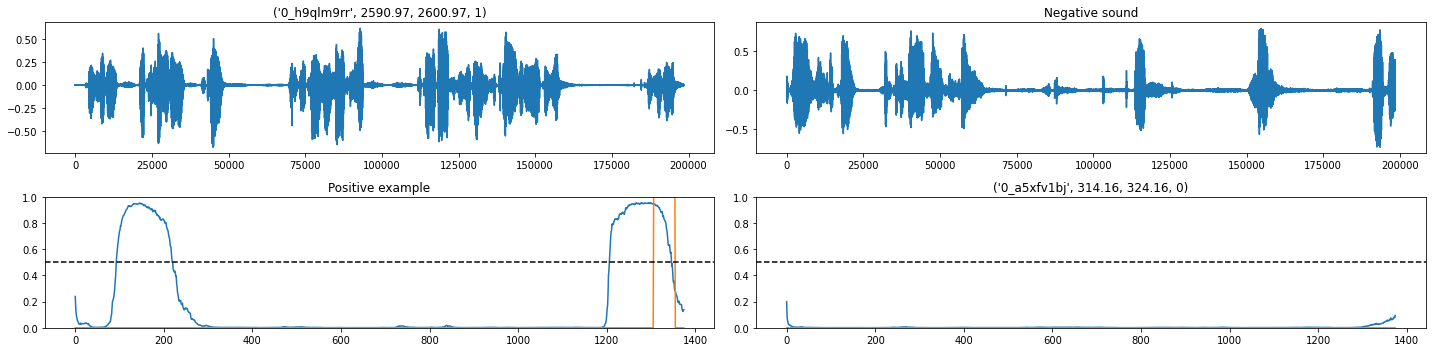

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_h9qlm9rr/format/url/protocol/https
From 00:43:10.97 to 00:43:20.97
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_a5xfv1bj/format/url/protocol/https
From 00:05:14.16 to 00:05:24.16


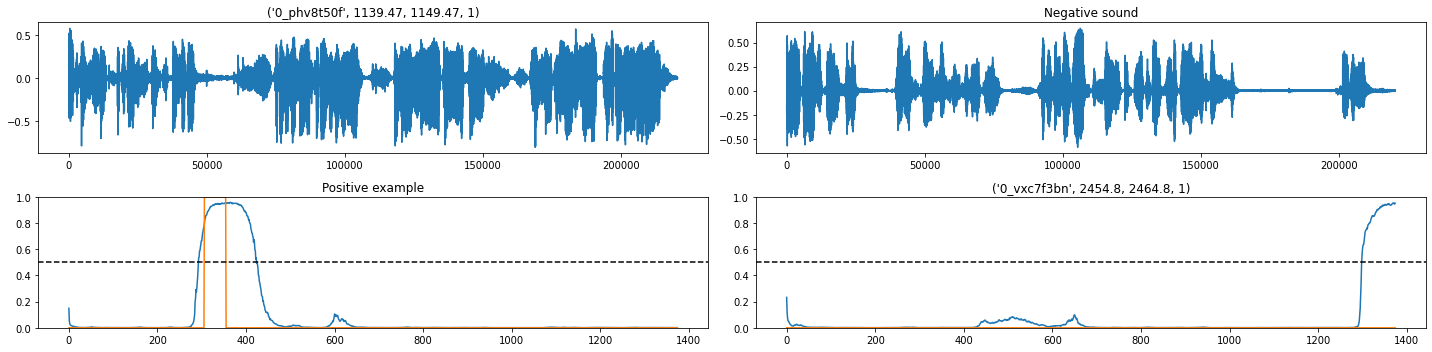

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_phv8t50f/format/url/protocol/https
From 00:18:59.47 to 00:19:09.47
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vxc7f3bn/format/url/protocol/https
From 00:40:54.80 to 00:41:04.80


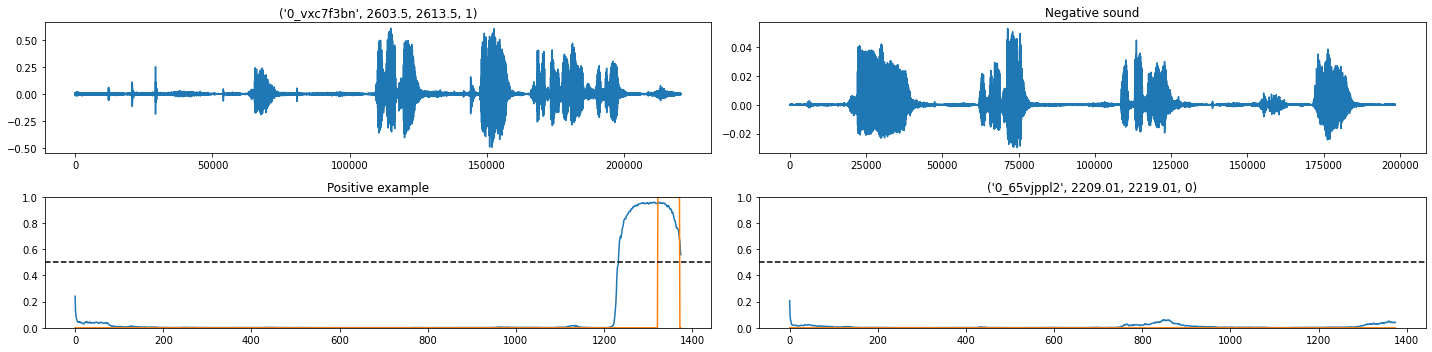

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vxc7f3bn/format/url/protocol/https
From 00:43:23.50 to 00:43:33.50
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_65vjppl2/format/url/protocol/https
From 00:36:49.01 to 00:36:59.01


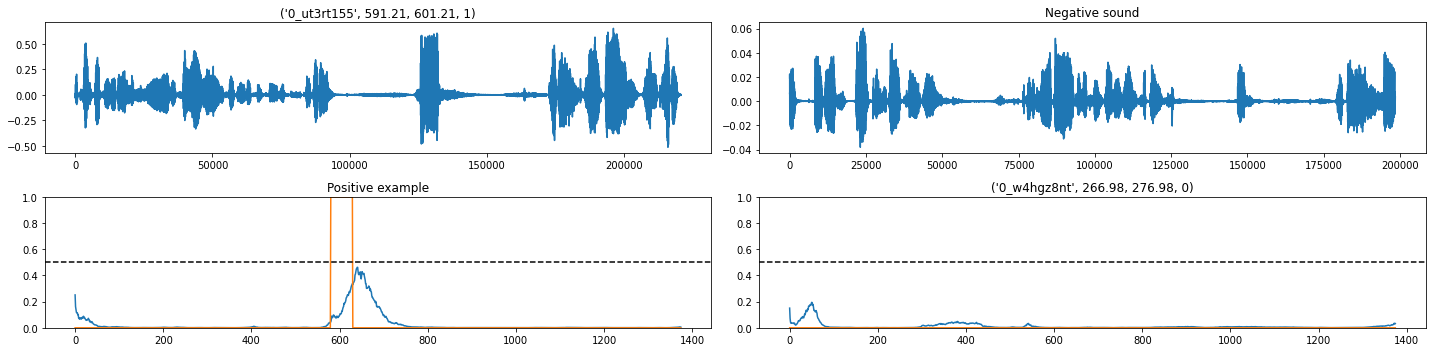

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ut3rt155/format/url/protocol/https
From 00:09:51.21 to 00:10:01.21
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w4hgz8nt/format/url/protocol/https
From 00:04:26.98 to 00:04:36.98


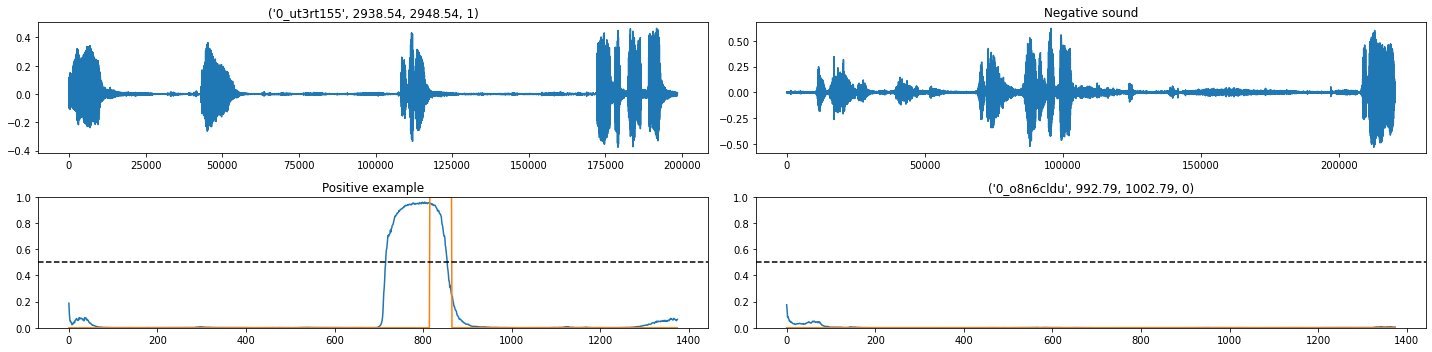

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ut3rt155/format/url/protocol/https
From 00:48:58.54 to 00:49:08.54
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_o8n6cldu/format/url/protocol/https
From 00:16:32.79 to 00:16:42.79


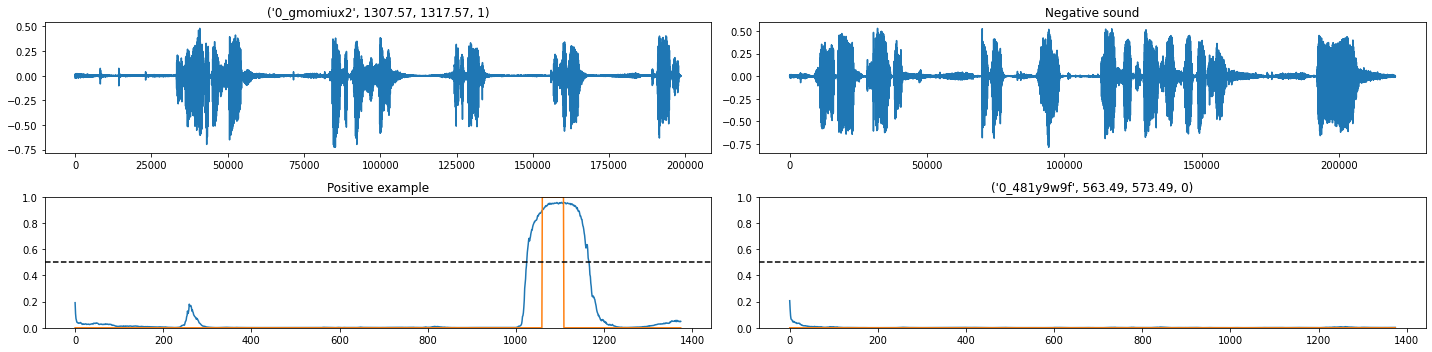

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_gmomiux2/format/url/protocol/https
From 00:21:47.57 to 00:21:57.57
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_481y9w9f/format/url/protocol/https
From 00:09:23.49 to 00:09:33.49


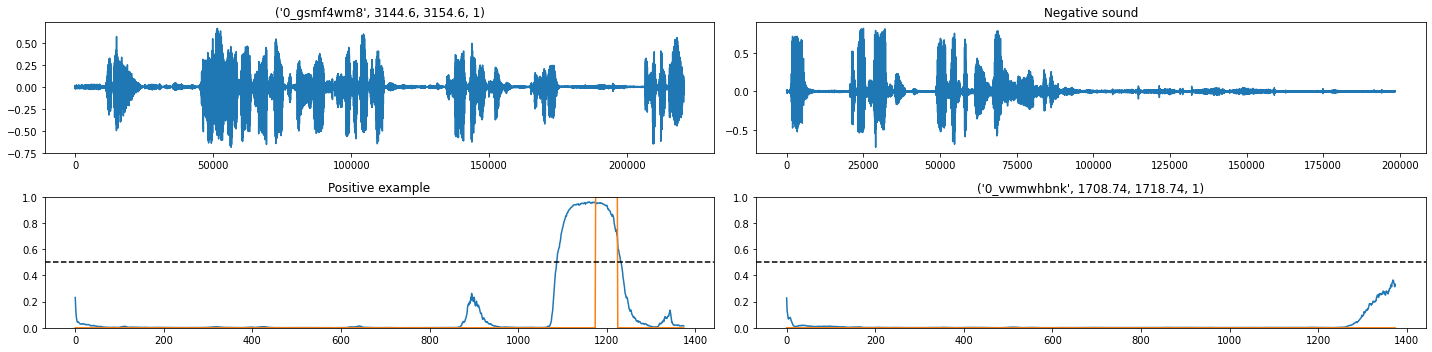

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_gsmf4wm8/format/url/protocol/https
From 00:52:24.60 to 00:52:34.60
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vwmwhbnk/format/url/protocol/https
From 00:28:28.74 to 00:28:38.74


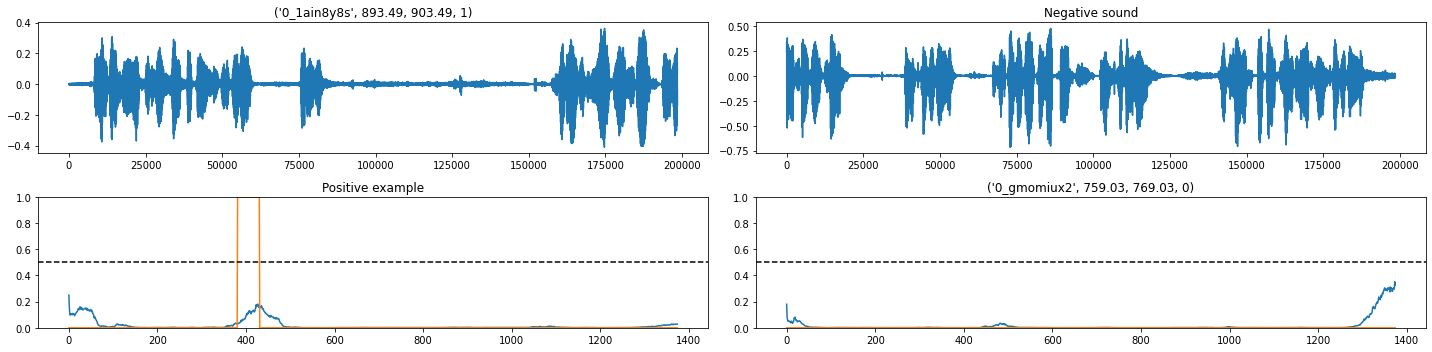

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_1ain8y8s/format/url/protocol/https
From 00:14:53.49 to 00:15:03.49
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_gmomiux2/format/url/protocol/https
From 00:12:39.03 to 00:12:49.03


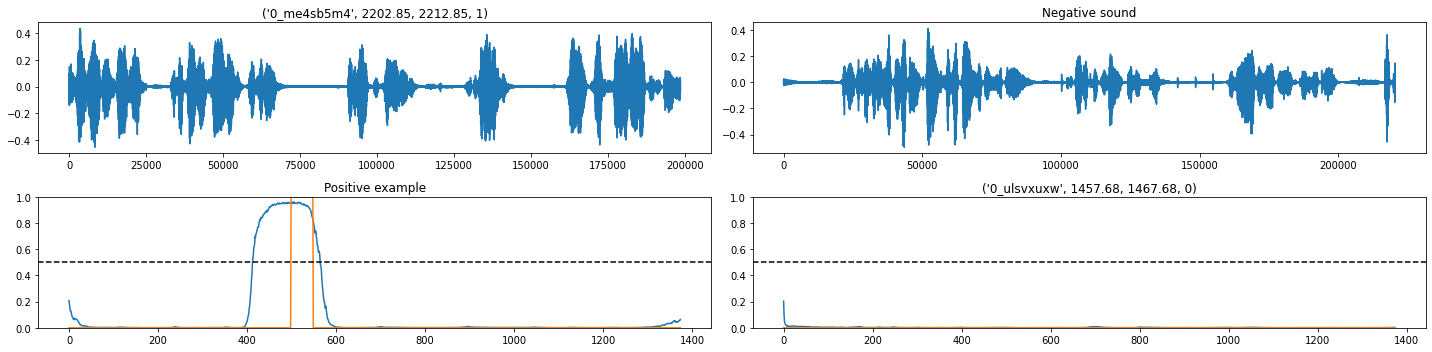

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_me4sb5m4/format/url/protocol/https
From 00:36:42.85 to 00:36:52.85
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ulsvxuxw/format/url/protocol/https
From 00:24:17.68 to 00:24:27.68


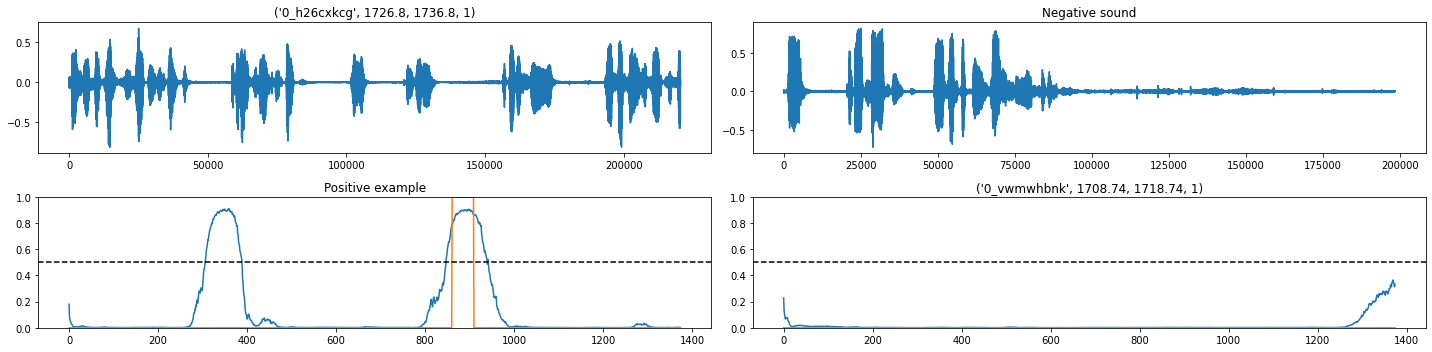

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_h26cxkcg/format/url/protocol/https
From 00:28:46.80 to 00:28:56.80
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vwmwhbnk/format/url/protocol/https
From 00:28:28.74 to 00:28:38.74


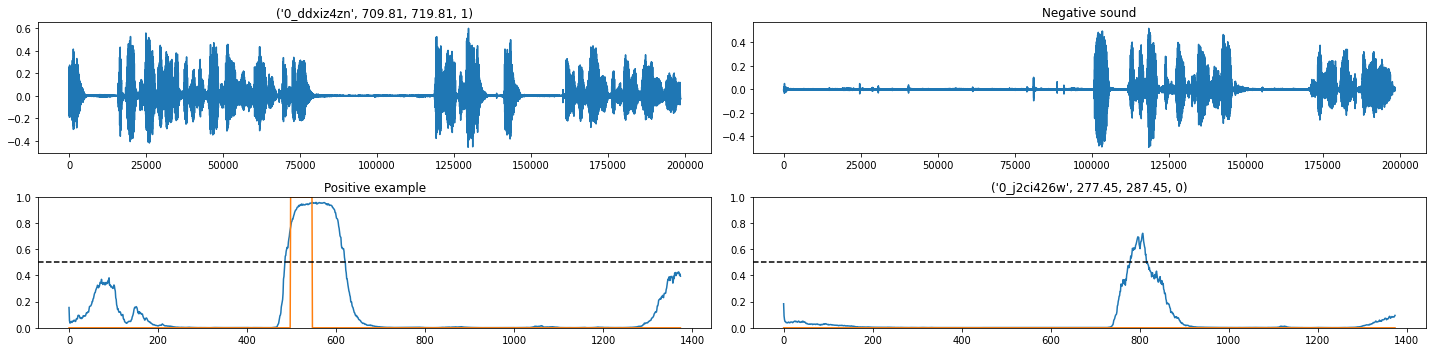

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ddxiz4zn/format/url/protocol/https
From 00:11:49.81 to 00:11:59.81
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_j2ci426w/format/url/protocol/https
From 00:04:37.45 to 00:04:47.45


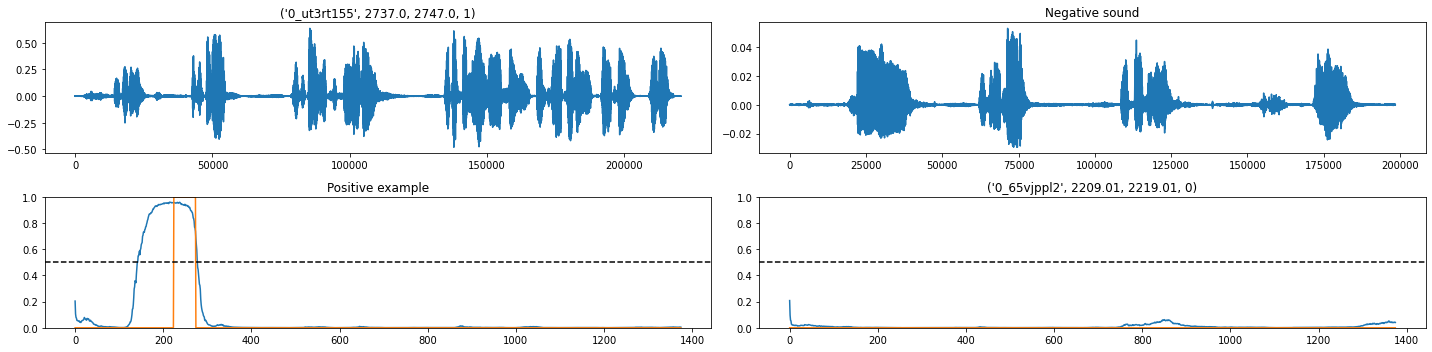

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ut3rt155/format/url/protocol/https
From 00:45:37.00 to 00:45:47.00
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_65vjppl2/format/url/protocol/https
From 00:36:49.01 to 00:36:59.01


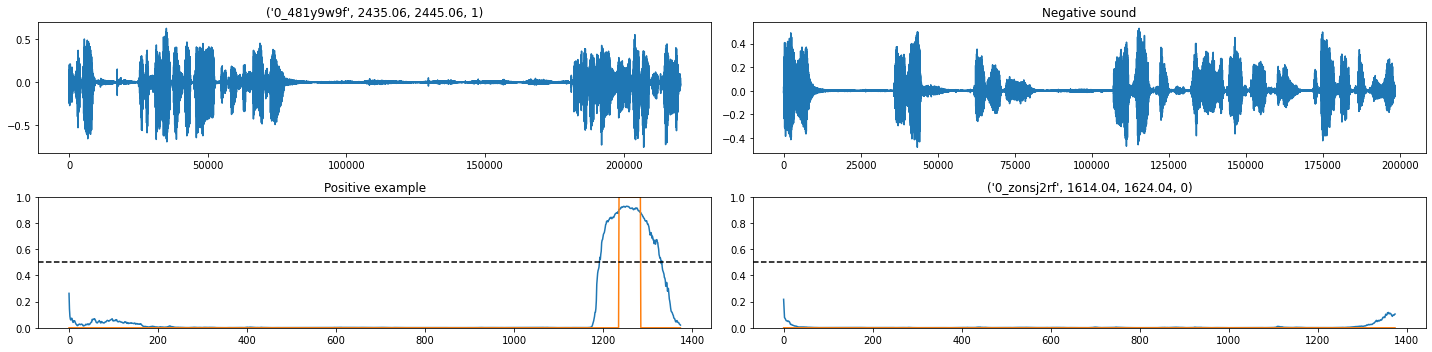

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_481y9w9f/format/url/protocol/https
From 00:40:35.06 to 00:40:45.06
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_zonsj2rf/format/url/protocol/https
From 00:26:54.04 to 00:27:04.04


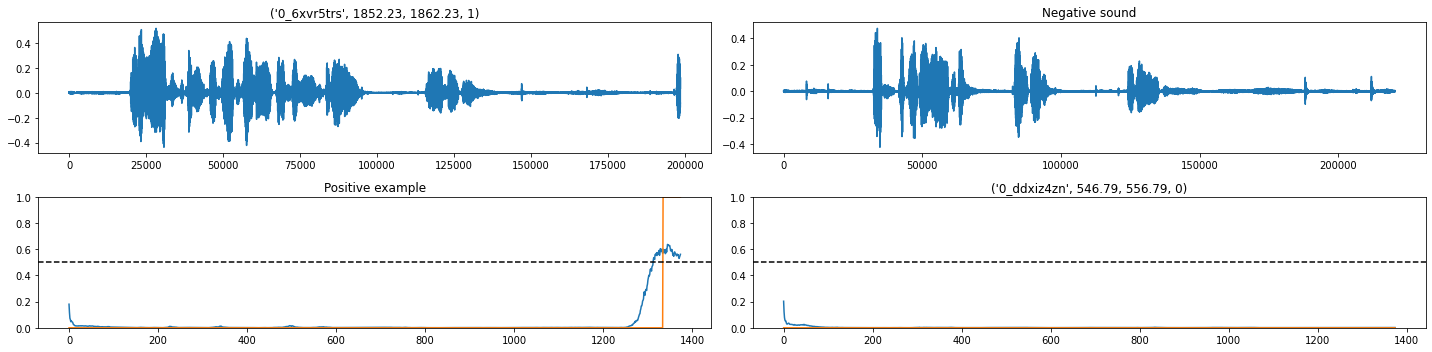

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_6xvr5trs/format/url/protocol/https
From 00:30:52.23 to 00:31:02.23
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ddxiz4zn/format/url/protocol/https
From 00:09:06.79 to 00:09:16.79


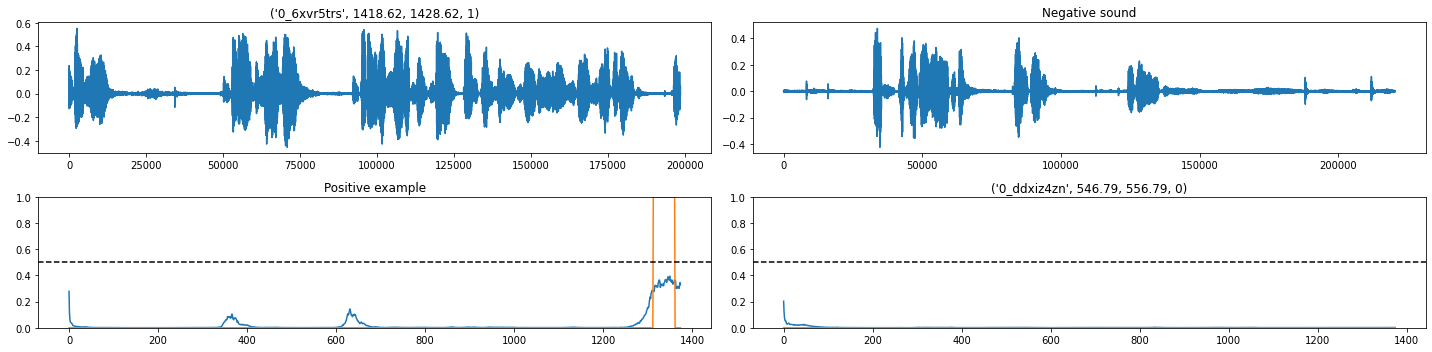

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_6xvr5trs/format/url/protocol/https
From 00:23:38.62 to 00:23:48.62
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_ddxiz4zn/format/url/protocol/https
From 00:09:06.79 to 00:09:16.79


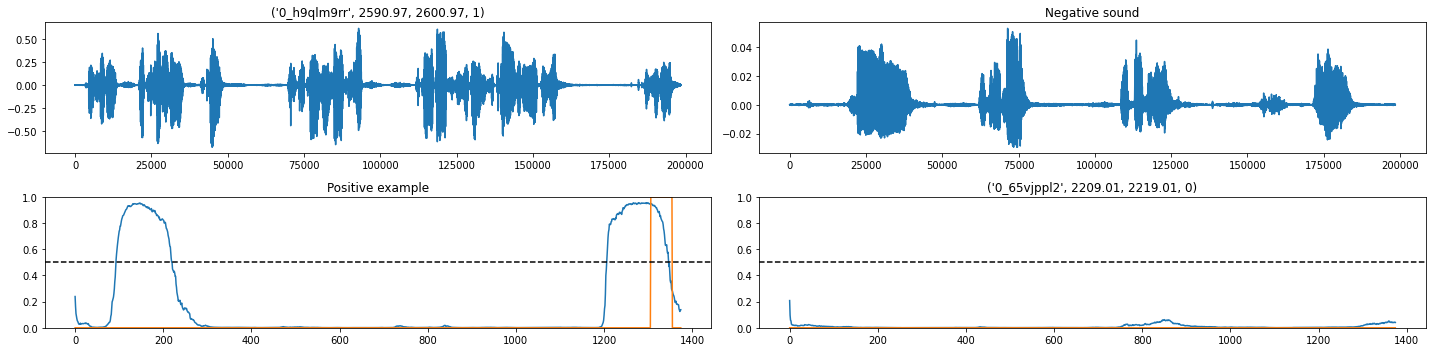

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_h9qlm9rr/format/url/protocol/https
From 00:43:10.97 to 00:43:20.97
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_65vjppl2/format/url/protocol/https
From 00:36:49.01 to 00:36:59.01


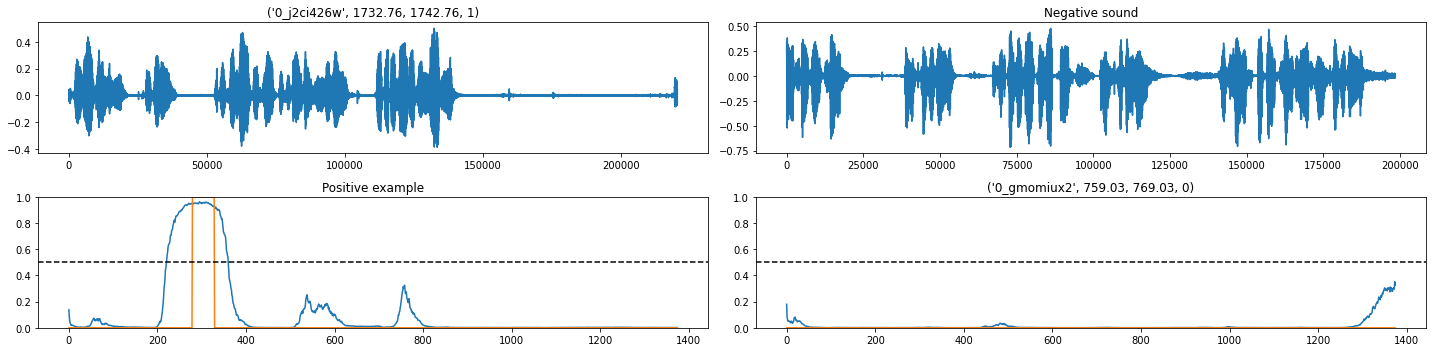

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_j2ci426w/format/url/protocol/https
From 00:28:52.76 to 00:29:02.76
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_gmomiux2/format/url/protocol/https
From 00:12:39.03 to 00:12:49.03


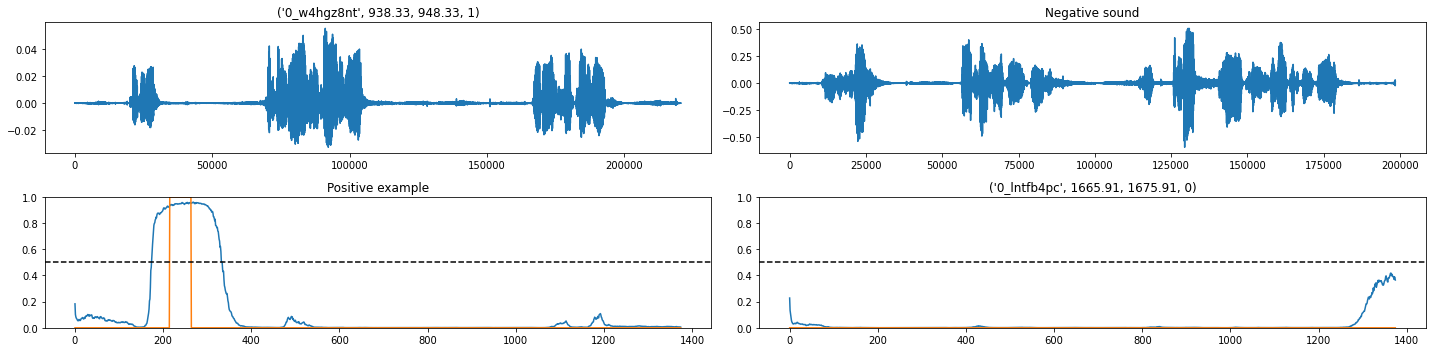

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w4hgz8nt/format/url/protocol/https
From 00:15:38.33 to 00:15:48.33
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_lntfb4pc/format/url/protocol/https
From 00:27:45.91 to 00:27:55.91


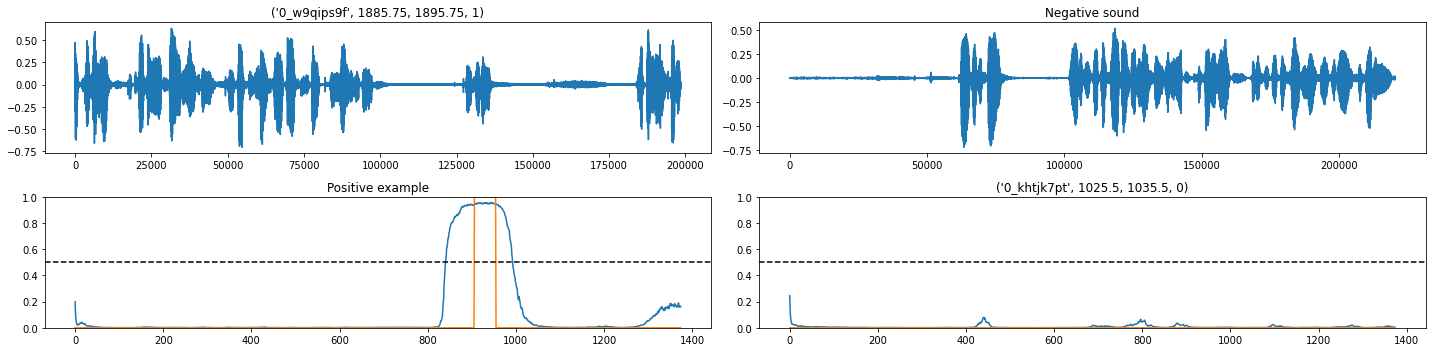

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w9qips9f/format/url/protocol/https
From 00:31:25.75 to 00:31:35.75
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_khtjk7pt/format/url/protocol/https
From 00:17:05.50 to 00:17:15.50


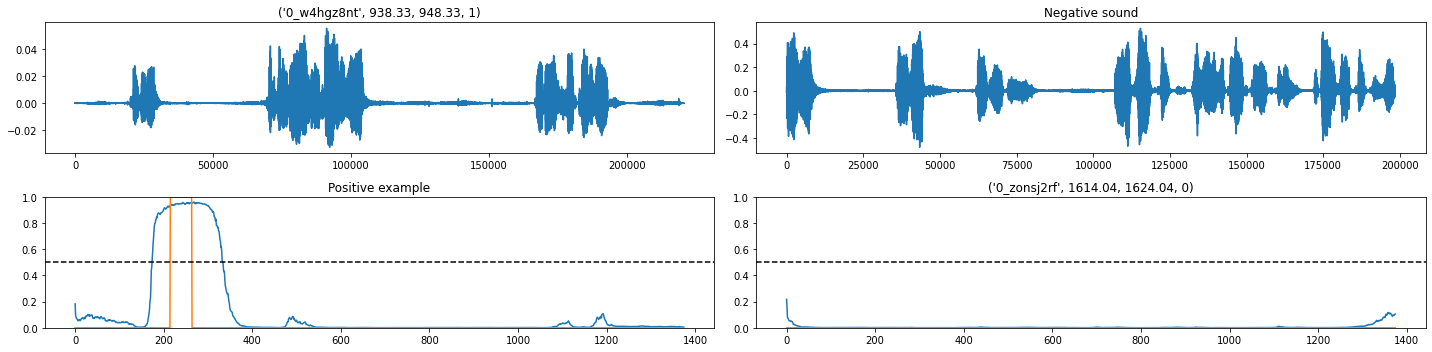

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w4hgz8nt/format/url/protocol/https
From 00:15:38.33 to 00:15:48.33
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_zonsj2rf/format/url/protocol/https
From 00:26:54.04 to 00:27:04.04


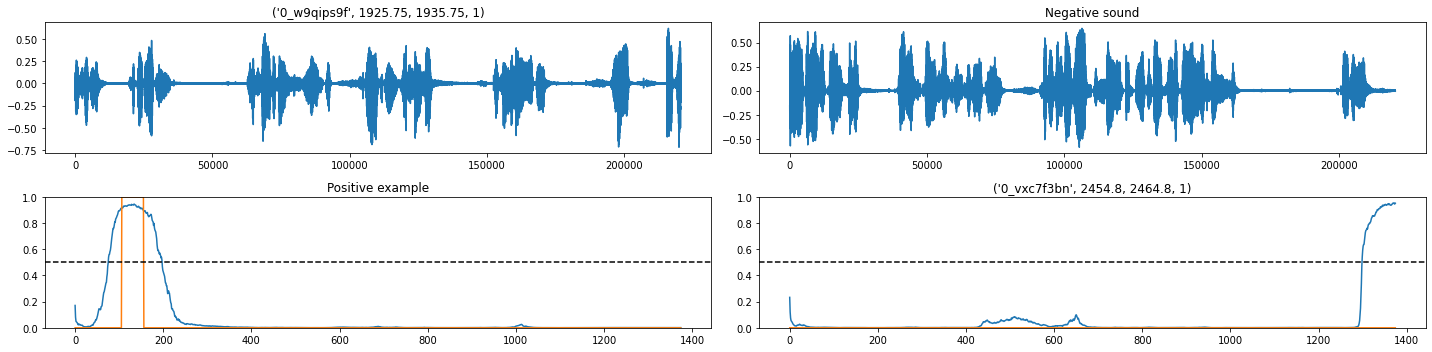

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w9qips9f/format/url/protocol/https
From 00:32:05.75 to 00:32:15.75
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_vxc7f3bn/format/url/protocol/https
From 00:40:54.80 to 00:41:04.80


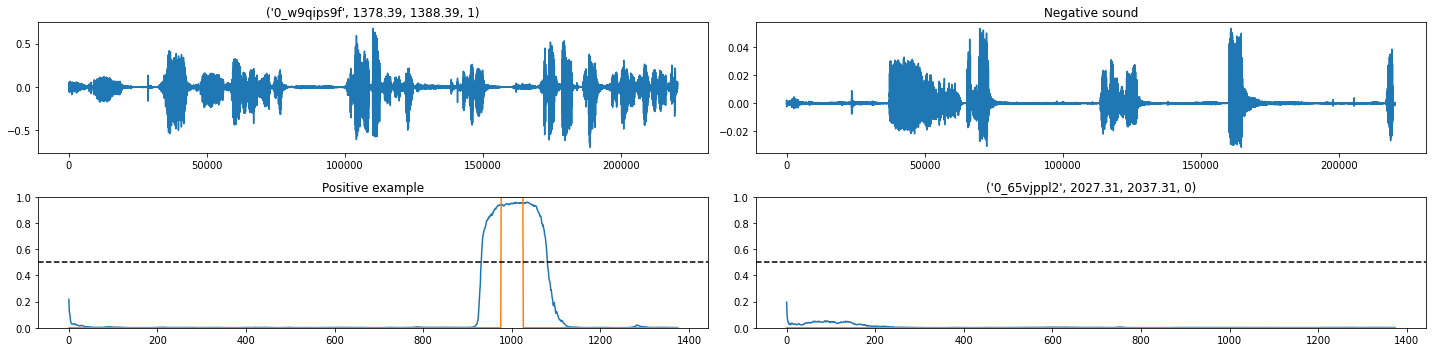

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w9qips9f/format/url/protocol/https
From 00:22:58.39 to 00:23:08.39
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_65vjppl2/format/url/protocol/https
From 00:33:47.31 to 00:33:57.31


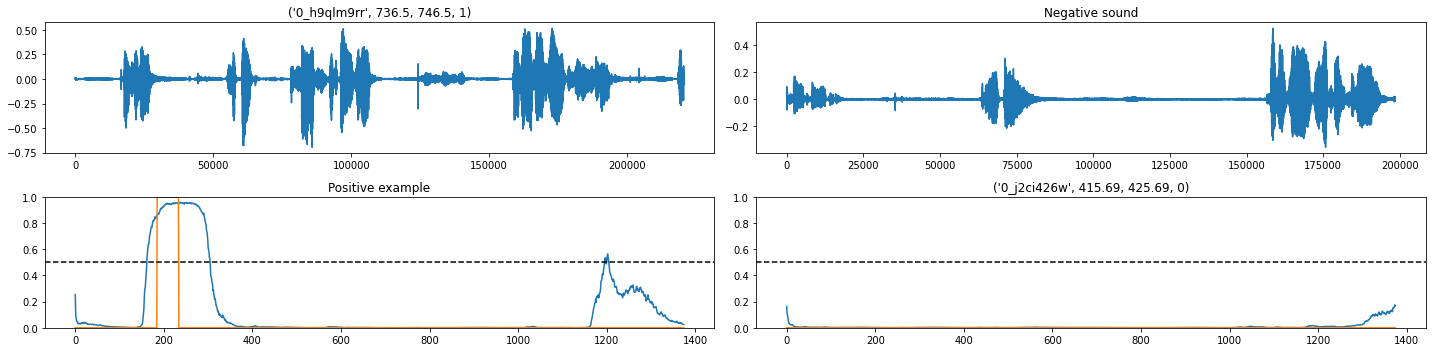

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_h9qlm9rr/format/url/protocol/https
From 00:12:16.50 to 00:12:26.50
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_j2ci426w/format/url/protocol/https
From 00:06:55.69 to 00:07:05.69


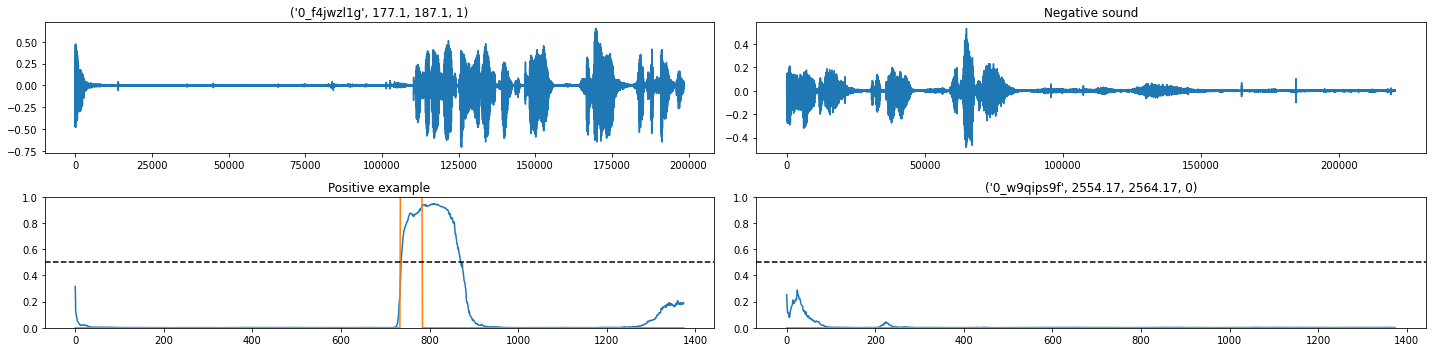

Positive example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_f4jwzl1g/format/url/protocol/https
From 00:02:57.10 to 00:03:07.10
Negative example:
https://dchsou11xk84p.cloudfront.net/p/201/sp/20100/playManifest/entryId/0_w9qips9f/format/url/protocol/https
From 00:42:34.17 to 00:42:44.17


In [8]:
for i in range(25):

    idx_positive = np.random.choice(torch.where(contains_catchphrase)[0])
    idx_negative = np.random.choice(torch.where(contains_catchphrase==0)[0])

    positive_path = path[idx_positive]
    negative_path = path[idx_negative]

    _, t1_pos, t2_pos, _ = wf.info_from_path(positive_path)
    _, t1_neg, t2_neg, _ = wf.info_from_path(negative_path)


    plt.figure(figsize=(20,5))

    plt.subplot(2,2,1)
    audio, sr = torchaudio.load(positive_path)
    plt.plot(audio.mean(axis=0))
    plt.title(wf.info_from_path(positive_path))

    plt.subplot(2,2,2)
    audio, sr = torchaudio.load(negative_path)
    plt.plot(audio.mean(axis=0))
    plt.title('Negative sound')

    plt.subplot(2,2,3)
    plt.title('Positive example')
    plt.plot(torch.sigmoid(outputs[idx_positive]).detach().cpu())
    plt.plot(targets[idx_positive].detach().cpu())
    plt.axhline(0.5, linestyle='--', color='black')
    plt.ylim([0, 1])

    plt.subplot(2,2,4)
    plt.title(wf.info_from_path(path[idx_negative]))
    plt.plot(torch.sigmoid(outputs[idx_negative]).detach().cpu())
    plt.plot(targets[idx_negative].detach().cpu())
    plt.axhline(0.5, linestyle='--', color='black')
    plt.ylim([0, 1])

    plt.tight_layout()
    plt.show()

    print('Positive example:')
    ID, t1, t2, _ = wf.info_from_path(path[idx_positive])
    print(bom1.stream_link(ID))
    print(f'From {bom1.seconds_to_timestamp(t1)} to {bom1.seconds_to_timestamp(t2)}')

    print('Negative example:')
    ID, t1, t2, _ = wf.info_from_path(path[idx_negative])
    print(bom1.stream_link(ID))
    print(f'From {bom1.seconds_to_timestamp(t1)} to {bom1.seconds_to_timestamp(t2)}')

# Evaluate an entire lecture

In [9]:
#Folder path which to evaluate on.
folderpath      = '/work3/s164419/01005WakeWordData/every50_1s_val_test/val'
files           = [x for x in os.listdir(folderpath) if x.endswith('.wav')]
ID_t1_t2_target = [wf.info_from_path(x) for x in files]

ID, t, target = [x[0] for x in ID_t1_t2_target], [np.mean(x[1:3]) for x in ID_t1_t2_target], [x[3] for x in ID_t1_t2_target]

val_df = pd.DataFrame({'ID' : ID, 't' : t, 'target' : target})

#Get durations for all of the lectures.
durations = wf.lecture_durations()

utterance_duration = 1
target_duration    = 0.36

In [10]:
df = pd.DataFrame(columns = list(val_df.columns) + ['p'])
for ID, grp in tqdm(val_df.groupby('ID')):
    grp = grp.copy()
    
    #Calculate the probability here.
    grp['p'] = 0
    
    with torch.no_grad():
       data = wf.load_data(f'/work3/s164419/01005WakeWordData/lectures/{ID}.wav', f=lambda x: T.AmplitudeToDB()(T.Spectrogram(hop_length=40)(x)), normalize=True, transforms=[wf.TransformMono()])
       _, _, x = data
       outputs = rnn(x.unsqueeze(0))
    
    #Calculate the probability and the corresponding timepoints for the RNN. 
    p = torch.sigmoid(outputs).squeeze(-1)
    t = np.linspace(0, durations[ID], len(p))
    
    #Shift the timestamps back to be able to compare it.
    t = t - (utterance_duration/2 + target_duration/2)
    
    #Here, we interpolate the shifted probability back.
    grp['p'] = np.interp(grp['t'].to_numpy(), t, p)
    
    #Append the probability to the total dataset.
    df = df.append(grp, ignore_index=True)

100%|██████████| 47/47 [57:57<00:00, 74.00s/it]


In [11]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

prec, recall, thresholds = precision_recall_curve(df['target'].to_numpy().astype(int), df['p'].to_numpy())

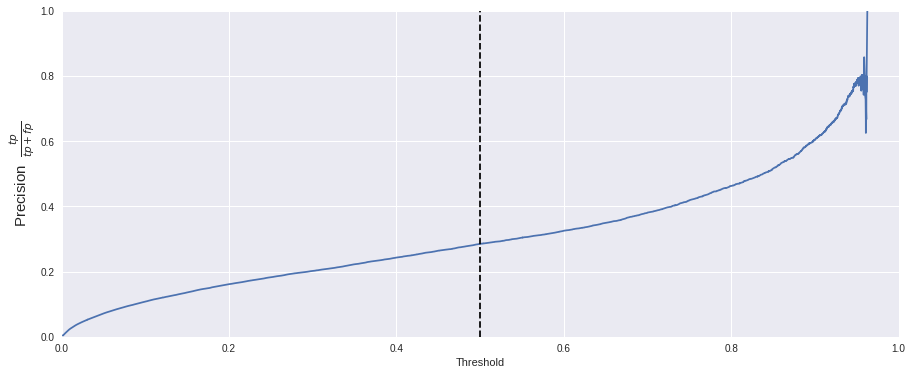

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.plot(thresholds, prec[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision  $\\frac{tp}{tp + fp}$', fontsize=15)
plt.axvline(0.5, color='black', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

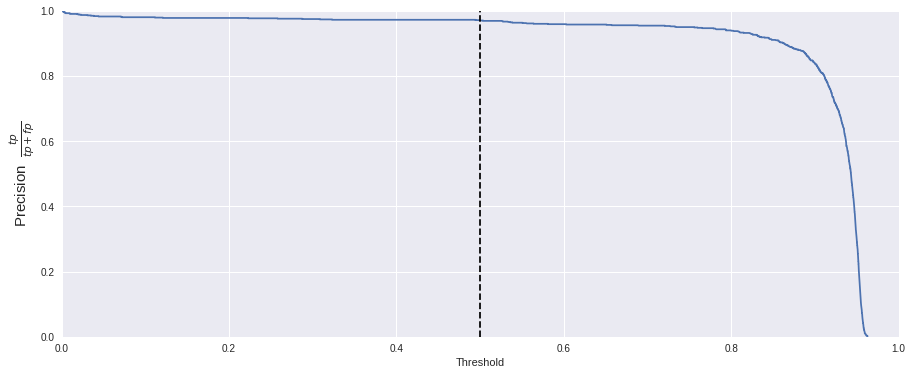

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(15,6))
plt.plot(thresholds, recall[:-1])
plt.xlabel('Threshold')
plt.ylabel('Precision  $\\frac{tp}{tp + fp}$', fontsize=15)
plt.axvline(0.5, color='black', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

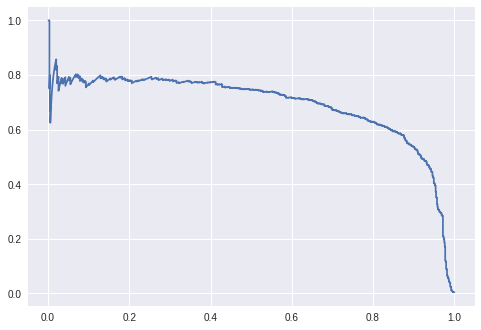

In [14]:
plt.plot(recall[:-1], prec[:-1])